This is the same thing as getWhissell but using the emotion dictionary from Warriner at al 2013. They have many more words (almost 14,000) but no function words, and they use lemmas on the assumption that only a few plurals are used more often than singulars and as such should not have very distinct emotional profiles. So processing this dictionary for scores will be a bit different. Their three vectors are Valence, Arousal, and Dominance. Dominance is not related to Whissell's Imagery so that third score will have to be neglected for now (though they discuss imageability on p. 1199. Brysbaert et al 2014 provides concreteness scores, and it is there that they discuss choosing lemmas over other forms. For that list, which they don't say how it might relate to this one, they include plurals that are used as different parts of speech or that are used more frequently than the singular [eyes]). 
As a first guess we lemmatize the text using textacy, running the default stop list. Lemmatization has its own pitfalls so we need to keep an eye on that. Valence (VA) mean is 5.06, Arousal (AR) is 4.21, and Dominance (DO) is 5.18 (on a scale from 1-9, lowest-highest).  

In [101]:
import matplotlib.pyplot as plt
from statistics import mean

targetDoc = "texts/waves-lemmas.txt"     # the text to analyze (relative path), already lemmatized.
targetWord = "bird"               # the word type you want to score. Needs to be a lemma.
targetWindow = 5                  # this is tokens before and after target
#outFile = "texts/mdg-lemmas.txt"

#file = open(outFile, "w")

document = open(targetDoc).read().split()
numbered = enumerate(document)

hitlist = []               #make a list of hits
for i, j in numbered:
    if j == targetWord:
        hitlist.append(i)
print(hitlist)  

#build dictionary for lookup
with open("texts/vad.csv") as vad_norms_file:
   vad = dict(line.rstrip().split(",", 1) for line in vad_norms_file)
#Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum

allvavals = []                   #declare lists of vals for every token found in text
allarvals = []
alldovals = []
allNonelist = []                 # keep all nonelist for token report
allAvgvavals = []                # keep list of avg vals for plotting
allAvgarvals = []
allAvgdovals = []

for hit in hitlist:
    phrase = []
    nonelist = []                #new val lists for each interation of a location
    vavals = []
    arvals = []
    dovals = []
    for index, word in enumerate(document):   # why can't we reuse numbered? This can't be the best way
        if index >= (hit - targetWindow) and index <=  (hit + targetWindow):
            phrase.append(word)
            if vad.get(word) is None:
                nonelist.append(word)         # prepare report of words not in VAD
            else:
                VMean,VSD,VRat,AMean,ASD,ARat,DMean,DSD,DRat = vad.get(word).split(",", 8)
                vavals.append(float(VMean))                    # have to convert these to fp numbers
                arvals.append(float(AMean))
                dovals.append(float(DMean))
                #print (word, "vavals = ", vavals)
                #print ("arvals length =",len(arvals))
        
    allvavals.extend(vavals)                 #add vals from this token onto alltokens list
    allarvals.extend(arvals)                 #to calculate mean of alltokens 
    alldovals.extend(dovals)                 #problem: target word gets added each time
    allNonelist.extend(nonelist)
    #print (alleevals) #check to see
    
    avgvavals = round(mean(vavals), 4)       # rounded to 4 decimal places like Whissell
    avgarvals = round(mean(arvals), 4)       # rounded to 4 decimal places like Whissell
    avgdovals = round(mean(dovals), 2)       # rounded to 2 decimal places like Whissell
    
    allAvgvavals.append(avgvavals - 5.06)  # .extend causes a TypeError: 'float' object is not iterable
    allAvgarvals.append(avgarvals - 4.21)  # We subtract the balanced corpus mean to give variance
    allAvgdovals.append(avgdovals - 5.18)
    
    # here follow the token reports: all the words, the No Vals list, and the scores
    print (targetWord, "offset =", hit)
    print (" ".join(wd for wd in phrase))
    print ("No Values for", nonelist)
    print ("VA =", avgvavals, "AR =", avgarvals, "DO =", avgdovals, "\n") 

hitratio = 100*(round(len(allvavals) / (len(allvavals) + len(allNonelist)), 3))
meanTotalvavals = round(mean(allvavals), 4)
meanTotalarvals = round(mean(allarvals), 4)
meanTotaldovals = round(mean(alldovals), 2)

# here follow the type reports: the target word, its score, and the hit ration. Need anything else?
print ("Type Means for", targetWord) 
print ("VA =", meanTotalvavals)
print ("AR =", meanTotalarvals)
print ("DO =", meanTotaldovals)
print ("No values for", list(sorted(set(allNonelist))))
print ("Hit Ratio = %",hitratio)          


[159, 187, 282, 353, 416, 693, 697, 1919, 2660, 5741, 6197, 6201, 6210, 7079, 7237, 7905, 8102, 8673, 10480, 10542, 10656, 10658, 10693, 10758, 10936, 11537, 12009, 12039, 12062, 13341, 13711, 13735, 15536, 16760, 18573, 20608, 20621, 20628, 23524, 23784, 24205, 25805, 26334, 26394, 26774, 27128, 28298, 28319, 28343, 28917, 29387, 30937, 31183, 32007, 32133, 32275, 32955, 33535, 33698, 33792, 34107, 34245]
bird offset = 159
tree garden make leaf transparent bird chirp high pause chirp lower
No Values for ['lower']
VA = 6.231 AR = 3.535 DO = 5.8 

bird offset = 187
blind stir slightly dim unsubstantial bird sing blank melody outside ring
No Values for ['slightly', 'unsubstantial', 'outside']
VA = 5.5225 AR = 3.8062 DO = 5.44 

bird offset = 282
grass say rhoda fall tree bird eye bright tunnel leaf say
No Values for ['rhoda']
VA = 6.018 AR = 3.908 DO = 5.67 

bird offset = 353
water white tide say bernard bird sing round say susan beast
No Values for ['bernard', 'susan']
VA = 6.2344 AR =

VA = 5.594 AR = 4.139 DO = 5.85 

bird offset = 31183
wave wood rustle bright colour bird youth youth expectant meet jinny
No Values for ['colour', 'expectant', 'jinny']
VA = 6.13 AR = 4.0488 DO = 5.7 

bird offset = 32007
burst asunder surrender leaf precise bird child hoop prancing dog warmth
No Values for ['asunder', 'prancing']
VA = 6.24 AR = 4.4489 DO = 5.39 

bird offset = 32133
round clump tree island sea bird sit stake roughened water wave
No Values for ['roughened']
VA = 6.181 AR = 3.381 DO = 5.36 

bird offset = 32275
uphold stay unmurmur pallid noonday bird creep close bough damp whiten
No Values for ['unmurmur', 'pallid', 'noonday', 'bough', 'whiten']
VA = 5.0617 AR = 3.7083 DO = 5.42 

bird offset = 32955
earth sheep munching push foot bird man drive spade earth bramble
No Values for ['munching', 'bramble']
VA = 5.9111 AR = 4.0356 DO = 5.3 

bird offset = 33535
pear thin mottle like sea bird egg fork lay straight appear
No Values for ['mottle', 'straight']
VA = 6.1967 AR =

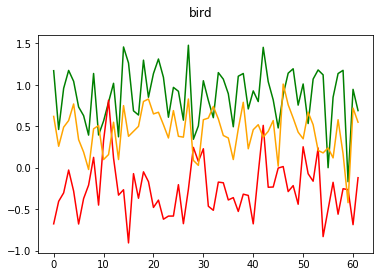

In [102]:
plt.plot(allAvgvavals, 'g', allAvgarvals, 'r', allAvgdovals, 'orange')
plt.suptitle(targetWord)
plt.show()